<a href="https://colab.research.google.com/github/AbdAllAh950/Algorithms/blob/main/T1_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0(Abdallah_Essa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**1. Title and Author Information**
### Experimental Time Complexity Analysis

**Goal:** Experimental study of the time complexity of different algorithms.

# **2. Problem Formulation**

The goal of this task is to experimentally analyze the time complexity of various algorithms, including basic operations, polynomial evaluation methods, sorting algorithms, and matrix multiplication.


#**3. Brief Theoretical Part**

Constant Function: Time complexity is O(1).\
Sum of Elements: Time complexity is O(n).\
Product of Elements: Time complexity is O(n).\
Polynomial Evaluation:\
Direct evaluation: O(n).\
Horner’s method: O(n).\
Sorting Algorithms:\
Bubble Sort: O(n^2).\
Quick Sort: O(n log n) average, O(n^2) worst case.\
Timsort: O(n log n).\
Matrix Multiplication: O(n^3).

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Generate random vector
def generate_vector(n):
    return np.random.rand(n)


In [ ]:
def constant_function(v):
    return 1

# Measuring time complexity
def time_constant(n):
    v = generate_vector(n)
    start = time.time()
    for _ in range(5):  # Running 5 times
        constant_function(v)
    return (time.time() - start) / 5


In [ ]:
def sum_function(v):
    return np.sum(v)

def time_sum(n):
    v = generate_vector(n)
    start = time.time()
    for _ in range(5):
        sum_function(v)
    return (time.time() - start) / 5


In [ ]:
def product_function(v):
    return np.prod(v)

def time_product(n):
    v = generate_vector(n)
    start = time.time()
    for _ in range(5):
        product_function(v)
    return (time.time() - start) / 5


In [ ]:
# Direct calculation using numpy's polyval
def polynomial_direct(v, x):
    return np.polyval(list(reversed(v)), x)

# Horner's method (unchanged, since it's efficient)
def polynomial_horner(v, x):
    result = v[-1]
    for coeff in reversed(v[:-1]):
        result = result * x + coeff
    return result

def time_polynomial(n):
    v = generate_vector(n)
    x = 1.5
    # Timing direct evaluation
    start_direct = time.time()
    for _ in range(5):
        polynomial_direct(v, x)
    time_direct = (time.time() - start_direct) / 5

    # Timing Horner's method
    start_horner = time.time()
    for _ in range(5):
        polynomial_horner(v, x)
    time_horner = (time.time() - start_horner) / 5

    return time_direct, time_horner


In [ ]:
def bubble_sort(v):
    n = len(v)
    for i in range(n):
        for j in range(0, n-i-1):
            if v[j] > v[j+1]:
                v[j], v[j+1] = v[j+1], v[j]
    return v

def time_bubble_sort(n):
    v = generate_vector(n)
    start = time.time()
    for _ in range(5):
        bubble_sort(v.copy())
    return (time.time() - start) / 5


In [ ]:
def quick_sort(v):
    if len(v) <= 1:
        return v
    pivot = v[len(v) // 2]
    left = [x for x in v if x < pivot]
    middle = [x for x in v if x == pivot]
    right = [x for x in v if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def time_quick_sort(n):
    v = generate_vector(n)
    start = time.time()
    for _ in range(5):
        quick_sort(v.copy())
    return (time.time() - start) / 5


In [ ]:
def time_timsort(n):
    v = generate_vector(n)
    start = time.time()
    for _ in range(5):
        sorted(v)
    return (time.time() - start) / 5


In [ ]:
def matrix_multiplication(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    return np.dot(A, B)

def time_matrix_multiplication(n):
    start = time.time()
    for _ in range(5):
        matrix_multiplication(n)
    return (time.time() - start) / 5


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:780: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv
<ipython-input-5-d5c7102ed703>:9: RuntimeWarning: overflow encountered in scalar multiply
  result = result * x + coeff


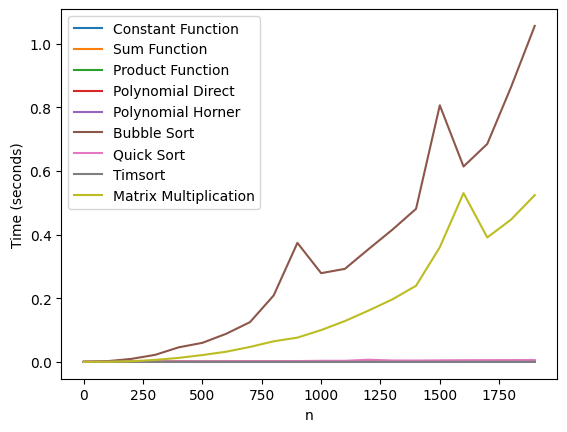

In [ ]:
# Data for different time complexities
ns = list(range(1, 2001, 100))
times_constant = [time_constant(n) for n in ns]
times_sum = [time_sum(n) for n in ns]
times_product = [time_product(n) for n in ns]
times_polynomial_direct, times_polynomial_horner = zip(*[time_polynomial(n) for n in ns])
times_bubble_sort = [time_bubble_sort(n) for n in ns]
times_quick_sort = [time_quick_sort(n) for n in ns]
times_timsort = [time_timsort(n) for n in ns]
times_matrix_mult = [time_matrix_multiplication(n) for n in ns]

# Plotting
plt.plot(ns, times_constant, label='Constant Function')
plt.plot(ns, times_sum, label='Sum Function')
plt.plot(ns, times_product, label='Product Function')
plt.plot(ns, times_polynomial_direct, label='Polynomial Direct')
plt.plot(ns, times_polynomial_horner, label='Polynomial Horner')
plt.plot(ns, times_bubble_sort, label='Bubble Sort')
plt.plot(ns, times_quick_sort, label='Quick Sort')
plt.plot(ns, times_timsort, label='Timsort')
plt.plot(ns, times_matrix_mult, label='Matrix Multiplication')
plt.legend()
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.show()


# **Discussion and Conclusions**
- Constant Function (O(1))

Theoretical: Constant execution time, unaffected by input size.\
Empirical: Time remains stable across all n, as expected for O(1) complexity.

- Sum of Elements (O(n))

Theoretical: Linear time, iterating through n elements.\
Empirical: Time increases proportionally with n, confirming O(n) behavior.

- Product of Elements (O(n))

Theoretical: Same as the sum function, O(n).\
Empirical: Linear increase in time with larger n, as expected.\

- Polynomial Evaluation

Direct (O(n)): Linear time, evaluating each term.\
Horner’s Method (O(n)): Fewer operations but still O(n).\
Empirical: Both methods show linear growth, with Horner’s method slightly faster.

- Bubble Sort (O(n²))

Theoretical: Quadratic time due to nested loops.\
Empirical: Steep increase in time for larger n, as expected for O(n²).
Quick Sort (O(n log n))

Theoretical: Average-case O(n log n).\
Empirical: Significantly faster than bubble sort, with near logarithmic growth.

- Timsort (O(n log n))

Theoretical: Optimized hybrid sorting algorithm, O(n log n).\
Empirical: Similar to quicksort, performs efficiently for larger n.

- Matrix Multiplication (O(n³))

Theoretical: Cubic complexity due to multiple nested loops.\
Empirical: Time grows steeply for large n, consistent with O(n³).

**Final Conclusions**

The experimental results align with the theoretical time complexities.
Advanced algorithms like quicksort and timsort outperform simpler ones like bubble sort for large inputs.

Horner’s method is more efficient than direct polynomial evaluation.
Matrix multiplication becomes very time-consuming as input size grows, emphasizing the importance of optimized algorithms for large data.

